In [1]:
import numpy as np

In [2]:
import keras

In [3]:
import cv2
import os
from PIL import Image

In [4]:
import tensorflow as ts

In [5]:
from matplotlib import pyplot as plt

In [6]:

import pandas as pd

In [7]:
np.random.seed(1000)

In [8]:
import numpy as np

In [9]:
os.environ['KERAS_BACKEND']='tensorflow'

# Model Building

In [10]:
image_directory=(r'C:\Users\cm20470\Anu_python/')

In [11]:
SIZE=64

In [12]:
dataset=[]
label=[]

In [13]:
Pseparated_images=os.listdir(image_directory + 'Pseparated/')

In [14]:
Pseparated_images

['aug_0_1027.png',
 'aug_0_1197.png',
 'aug_0_12.png',
 'aug_0_1238.png',
 'aug_0_1535.png',
 'aug_0_1559.png',
 'aug_0_1637.png',
 'aug_0_1984.png',
 'aug_0_2011.png',
 'aug_0_2024.png',
 'aug_0_2082.png',
 'aug_0_2186.png',
 'aug_0_23.png',
 'aug_0_2368.png',
 'aug_0_2401.png',
 'aug_0_2489.png',
 'aug_0_2602.png',
 'aug_0_2740.png',
 'aug_0_2770.png',
 'aug_0_2784.png',
 'aug_0_2922.png',
 'aug_0_2976.png',
 'aug_0_3012.png',
 'aug_0_3061.png',
 'aug_0_3110.png',
 'aug_0_3320.png',
 'aug_0_3422.png',
 'aug_0_3766.png',
 'aug_0_407.png',
 'aug_0_4129.png',
 'aug_0_4189.png',
 'aug_0_4201.png',
 'aug_0_4397.png',
 'aug_0_4411.png',
 'aug_0_4436.png',
 'aug_0_4463.png',
 'aug_0_4561.png',
 'aug_0_4590.png',
 'aug_0_4615.png',
 'aug_0_47.png',
 'aug_0_482.png',
 'aug_0_5131.png',
 'aug_0_518.png',
 'aug_0_5203.png',
 'aug_0_5252.png',
 'aug_0_5284.png',
 'aug_0_5420.png',
 'aug_0_5524.png',
 'aug_0_5611.png',
 'aug_0_5664.png',
 'aug_0_5822.png',
 'aug_0_6027.png',
 'aug_0_6044.png',
 '

In [15]:
for i, image_name in enumerate(Pseparated_images):
    if (image_name.split('.')[1]=='png'):
        image=cv2.imread(image_directory + 'Pseparated/' + image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [16]:
len(dataset)


63

In [17]:
Dispersed_images=os.listdir(image_directory + 'Dispersed/')

In [18]:
for i, image_name in enumerate(Dispersed_images):
    if (image_name.split('.')[1]=='png'):
        image=cv2.imread(image_directory + 'Dispersed/' + image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [19]:
print(label)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
len(dataset)

126

In [21]:
INPUT_SHAPE=(SIZE,SIZE,3)

In [22]:
inp=keras.layers.Input(shape=INPUT_SHAPE)

In [23]:
conv1=keras.layers.Conv2D(32,kernel_size=(3,3),
                          activation='relu',
                          padding='same')(inp)

In [24]:
pool1=keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
norm1=keras.layers.BatchNormalization(axis=-1)(pool1)
drop1=keras.layers.Dropout(rate=0.2)(norm1)

In [25]:
conv2=keras.layers.Conv2D(32,kernel_size=(3,3),
                          activation='relu',
                          padding='same')(drop1)

In [26]:
pool2=keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
norm2=keras.layers.BatchNormalization(axis=-1)(pool2)
drop2=keras.layers.Dropout(rate=0.2)(norm2)

In [27]:
flat=keras.layers.Flatten()(drop2)

In [28]:
hidden1=keras.layers.Dense(512,activation='relu')(flat)
norm3=keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3=keras.layers.Dropout(rate=0.2)(norm3)

In [29]:
hidden2=keras.layers.Dense(512,activation='relu')(drop3)
norm4=keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4=keras.layers.Dropout(rate=0.2)(norm4)

In [30]:
out=keras.layers.Dense(2,activation='sigmoid')(drop4)

In [31]:
model=keras.Model(inputs=inp,outputs=out)

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.20, random_state=1)

In [41]:
history=model.fit(np.array(X_train),y_train, batch_size=5,verbose=1,epochs=6,validation_split=0.2,shuffle=True)

Epoch 1/6
16/16 [==============================] - 1s 54ms/step - loss: 0.3877 - accuracy: 0.8875 - val_loss: 13.8710 - val_accuracy: 0.5500
Epoch 2/6
16/16 [==============================] - 1s 51ms/step - loss: 0.3810 - accuracy: 0.9125 - val_loss: 19.4109 - val_accuracy: 0.5500
Epoch 3/6
16/16 [==============================] - 1s 49ms/step - loss: 0.2009 - accuracy: 0.9250 - val_loss: 8.7767 - val_accuracy: 0.5500
Epoch 4/6
16/16 [==============================] - 1s 50ms/step - loss: 0.5298 - accuracy: 0.8750 - val_loss: 4.1361 - val_accuracy: 0.6000
Epoch 5/6
16/16 [==============================] - 1s 47ms/step - loss: 0.2544 - accuracy: 0.9250 - val_loss: 2.5240 - val_accuracy: 0.6000
Epoch 6/6
16/16 [==============================] - 1s 55ms/step - loss: 0.2177 - accuracy: 0.9375 - val_loss: 1.0344 - val_accuracy: 0.6500


In [39]:
print("Test_Accuracy: {:.1f}%".format(model.evaluate(np.array(X_test),np.array(y_test))[1]*100))

1/1 [==============================] - 0s 33ms/step - loss: 0.1126 - accuracy: 0.9231
Test_Accuracy: 92.3%


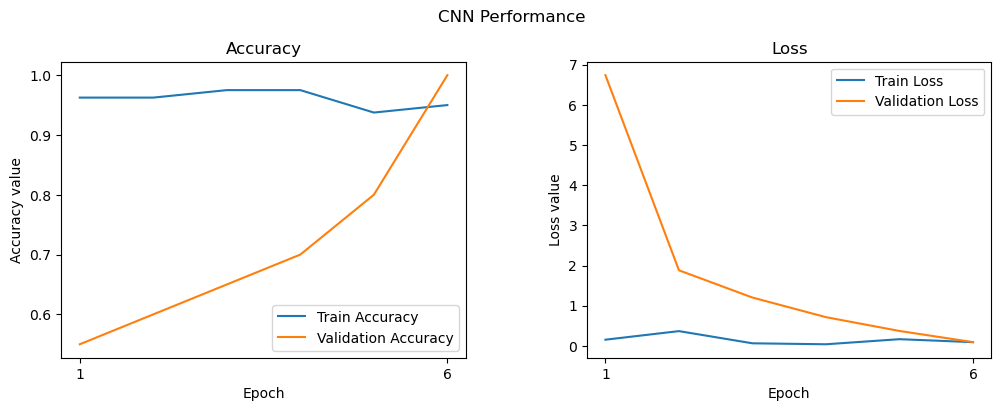

In [40]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
t=f.suptitle('CNN Performance',fontsize=12)
f.subplots_adjust(top=0.85,wspace=0.3)
max_epoch=len(history.history['accuracy']) + 1
epoch_list=list(range(1,max_epoch))
ax1.plot(epoch_list,history.history['accuracy'],label='Train Accuracy')
ax1.plot(epoch_list,history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_xticks(np.arange(1,max_epoch,5))
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy value')
ax1.set_title('Accuracy')
l1=ax1.legend(loc='best')


ax2.plot(epoch_list,history.history['loss'],label='Train Loss')
ax2.plot(epoch_list,history.history['val_loss'],label='Validation Loss')
ax2.set_xticks(np.arange(1,max_epoch,5))
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss value')
ax2.set_title('Loss')
l2=ax2.legend(loc='best')

In [46]:
model.save('phase_classification_1_jan22accuracy80.8_11th_feb_53_accuracy_old_data.h5')


In [47]:
import os

In [45]:
os.getcwd()

'C:\\Users\\cm20470\\Anu_python'

In [42]:
import tensorflow as tf
import cv2

In [43]:
CATEGORIES= ["Phase Separated", "Non Phase Separated"]

In [44]:
def prepare(filepath):
    SIZE=64
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array,(SIZE,SIZE))
    return new_array.reshape(-1,SIZE,SIZE,3)

In [45]:
model=tf.keras.models.load_model("phase_classification_1_jan22accuracy80.8_11th_feb_53_accuracy_old_data.h5")

In [46]:
prediction=model.predict([prepare("test_4.png")])


In [47]:
print(prediction)

[[5.2848458e-04 9.9572176e-01]]


In [48]:
print(CATEGORIES[int(prediction[0][0])])

Phase Separated


In [84]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model

In [91]:
layer=model.layers
len(layer)

17

In [95]:
layer

In [101]:
filters,biases=model.layers[1].get_weights()

In [97]:
len(filters)

3

In [98]:
len(biases)

32

In [94]:
filters

array([[[[-0.1243183 ,  0.13274951,  0.01316148,  0.12735945,
          -0.10498542, -0.01480392, -0.01905364, -0.01591934,
          -0.01351567,  0.03791531,  0.07369909,  0.03896924,
          -0.07091669,  0.10925455, -0.06195553,  0.07586775,
           0.06005298,  0.002342  , -0.00203775,  0.07068453,
           0.10355698,  0.00705961,  0.01173918,  0.04822619,
          -0.00428717,  0.0938229 , -0.07262123,  0.06645682,
           0.05510688,  0.01129217,  0.02308095,  0.01742714],
         [-0.10578652, -0.09397272, -0.10528801,  0.1230461 ,
          -0.06153544,  0.12583433, -0.1288928 , -0.06341828,
          -0.07813675, -0.01002098, -0.06925192,  0.00799079,
          -0.05995443, -0.09955516, -0.02992592,  0.10595769,
          -0.09837976,  0.0624166 ,  0.02961254, -0.03861499,
           0.01550029,  0.10069302,  0.00279549, -0.10247504,
          -0.12292816, -0.09700651,  0.09259056,  0.06367512,
          -0.02800321,  0.05868681, -0.08209218,  0.01903744],
      

In [87]:
print(layer[1].name, filters.shape)

conv2d_2 (3, 3, 3, 32)


In [102]:
print(layer[6].name, filters.shape)

max_pooling2d_3 (3, 3, 3, 32)


IndexError: index 32 is out of bounds for axis 3 with size 32

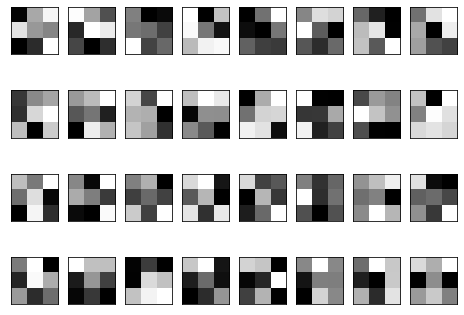

In [103]:
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()    


In [36]:
import numpy as np
import cv2
from keras.models import load_model

# Load a pre-trained model
model = load_model("phase_classification_1_jan22accuracy80.8_11th_feb_53_accuracy_old_data.h5")

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
y_test=np.argmax(y_test,axis=1)


In [38]:
y_pred = model.predict(np.array(X_test))
y_pred = np.argmax(y_pred, axis=1)

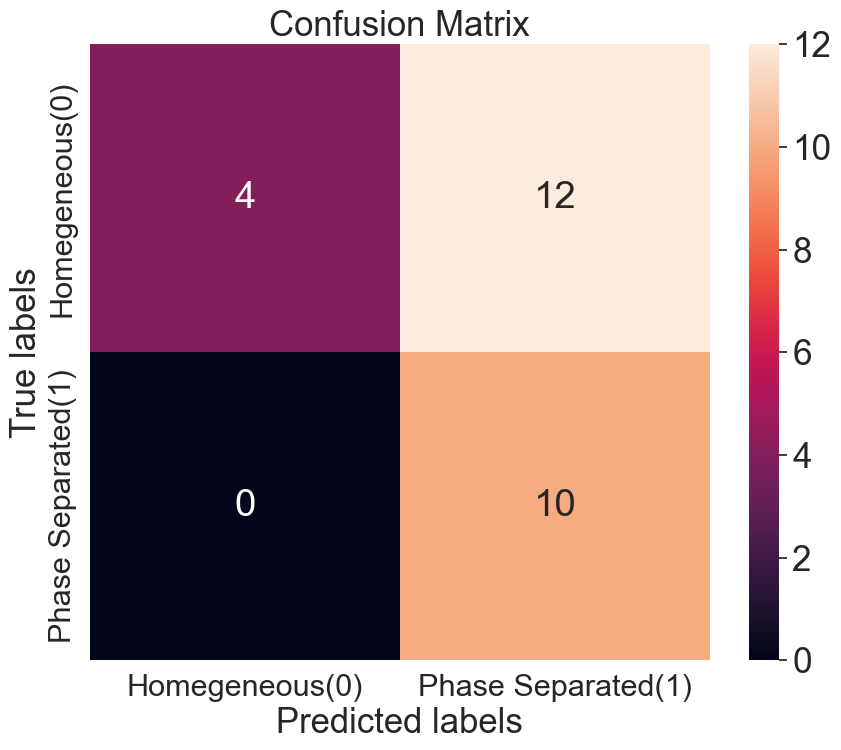

In [50]:
import seaborn as sns
from matplotlib import pyplot as plt
conf_mat = confusion_matrix(y_test, y_pred,labels=None, sample_weight=None, normalize=None)

plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.set(font_scale=2.3)
sns.heatmap(conf_mat, annot=True, fmt='d')

ax.set_xlabel('Predicted labels',fontsize=25);ax.set_ylabel('True labels',fontsize=25); 
ax.set_title('Confusion Matrix',fontsize=25); 
ax.tick_params(axis='both', which='major', labelsize=22)

ax.xaxis.set_ticklabels(['Homegeneous(0)', 'Phase Separated(1)']); ax.yaxis.set_ticklabels(['Homegeneous(0)', 'Phase Separated(1)']);

In [53]:
fpr, tpr, thresholds=roc_curve(y_test,y_pred)

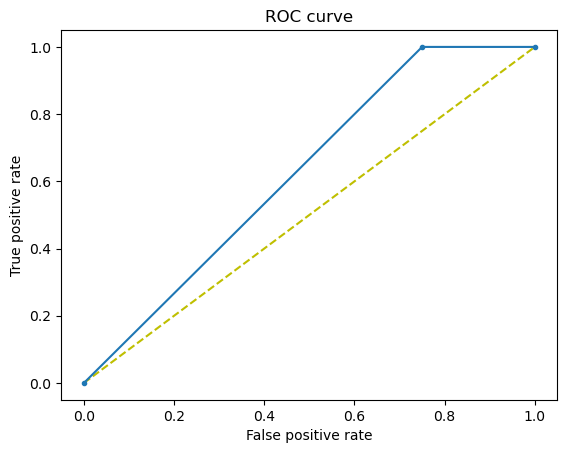

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [56]:
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro"))

0.5125
0.7272727272727273
0.625


In [58]:
print(y_pred)

[1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [59]:
print(y_test)

[0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0]


TypeError: Invalid shape () for image data

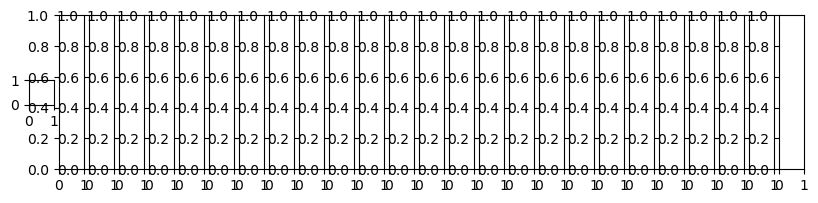

In [60]:
import matplotlib.pyplot as plt

# assuming y_test is a numpy array of image data with shape (num_images, height, width, num_channels)
num_images = y_test.shape[0]

# create a plot with subplots for each image
fig, ax = plt.subplots(1, num_images, figsize=(10, 2))

# plot each image on its own subplot
for i in range(num_images):
    ax[i].imshow(y_test[i])
    ax[i].axis('off')

# display the plot
plt.show()

In [62]:
y_test.shape

(26,)

In [64]:
import matplotlib.pyplot as plt

# assuming y_test is a numpy array of image data with shape (num_images, height, width, num_channels)
num_images = y_test.shape[26]

# create a plot with subplots for each image
fig, ax = plt.subplots(1, num_images, figsize=(10, 2))

# plot each image on its own subplot
for i in range(num_images):
    ax[i].imshow(y_test[i])
    ax[i].axis('off')

# display the plot
plt.show()

IndexError: tuple index out of range

TypeError: Invalid shape () for image data

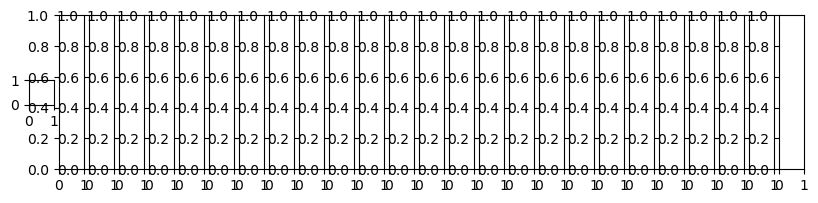

In [65]:
import matplotlib.pyplot as plt

# assuming y_test is a numpy array of image data with shape (num_images, height, width, num_channels)
num_images = y_test.shape[0]

# create a plot with subplots for each image
fig, ax = plt.subplots(1, num_images, figsize=(10, 2))

# plot each image on its own subplot
for i in range(num_images):
    ax[i].imshow(y_test[i])
    ax[i].axis('off')

# display the plot
plt.show()


TypeError: Can't convert object to 'str' for 'filename'

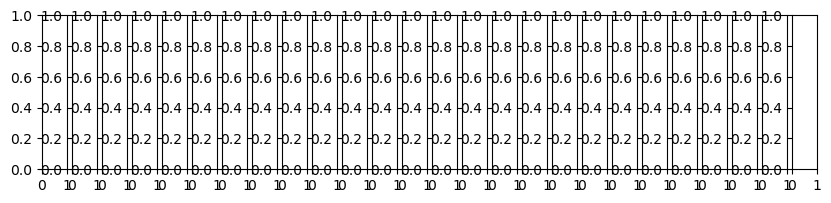

In [66]:
import cv2
import matplotlib.pyplot as plt

# assuming y_test is a list of image file names
num_images = len(y_test)

# create a plot with subplots for each image
fig, ax = plt.subplots(1, num_images, figsize=(10, 2))

# plot each image on its own subplot
for i in range(num_images):
    img = cv2.imread(y_test[i])
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].axis('off')

# display the plot
plt.show()


TypeError: Invalid shape () for image data

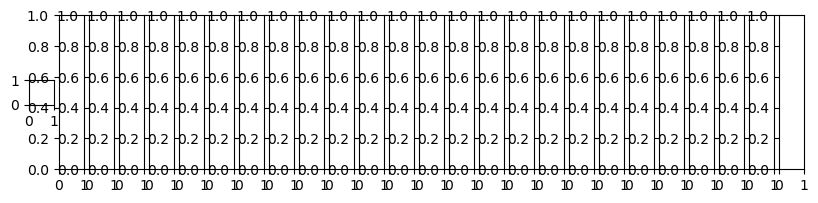

In [67]:
# assuming y_test is a numpy array of image data with shape (num_images, height, width, num_channels)
num_images = y_test.shape[0]

# create a plot with subplots for each image
fig, ax = plt.subplots(1, num_images, figsize=(10, 2))

# plot each image on its own subplot
for i in range(num_images):
    ax[i].imshow(y_test[i])
    ax[i].axis('off')

# display the plot
plt.show()


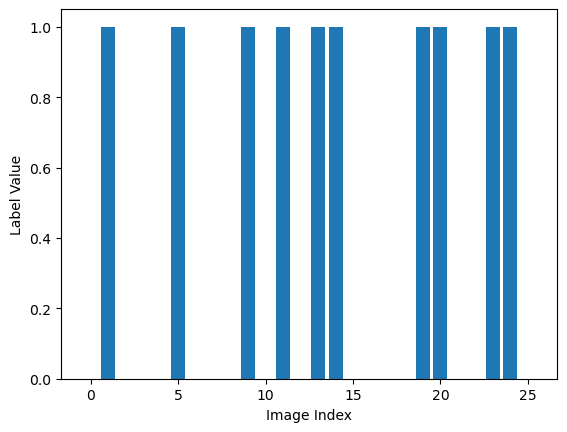

In [68]:
import matplotlib.pyplot as plt

# assuming y_test is a one-dimensional numpy array of binary labels
fig, ax = plt.subplots()
ax.bar(range(len(y_test)), y_test)
ax.set_xlabel('Image Index')
ax.set_ylabel('Label Value')
plt.show()


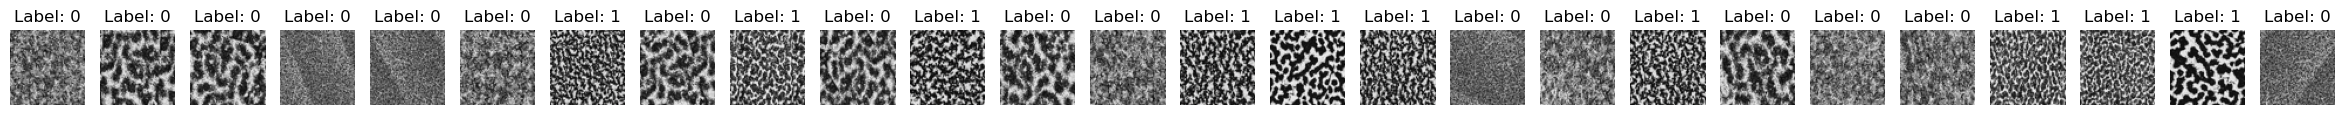

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# assuming X_test is a numpy array of image data with shape (num_images, height, width, num_channels)
num_images = 26
indices = np.random.choice(len(X_test), size=num_images, replace=False)

# create a plot with subplots for each image
fig, ax = plt.subplots(1, num_images, figsize=(30, 7))

# plot each image on its own subplot
for i in range(num_images):
    img = X_test[indices[i]]
    label = y_test[indices[i]]
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title("Label: {}".format(label))

# display the plot
plt.show()


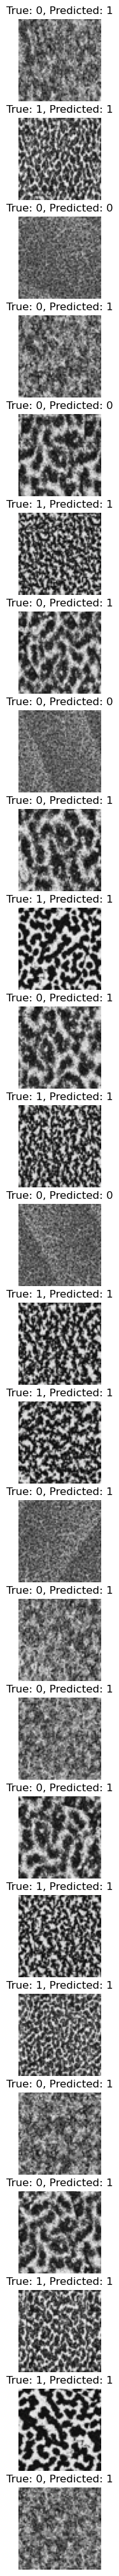

In [73]:
import matplotlib.pyplot as plt

# assuming y_test and y_pred are numpy arrays of labels with shape (num_images,)
# and X_test is a numpy array of image data with shape (num_images, height, width, num_channels)
num_images = y_test.shape[0]

# create a plot with subplots for each image
fig, ax = plt.subplots(num_images, 1, figsize=(10, 2*num_images))

# loop through the images and display them with their true and predicted labels
for i in range(num_images):
    # get the true and predicted labels for this image
    true_label = y_test[i]
    pred_label = y_pred[i]
    
    # get the image data and display it on the subplot
    img = X_test[i]
    ax[i].imshow(img)
    ax[i].axis('off')
    
    # add the true and predicted labels as a title to the subplot
    title = f'True: {true_label}, Predicted: {pred_label}'
    ax[i].set_title(title)

# display the plot
plt.show()
